In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numba

from typing import Dict

from saturation.simulation import *
from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

In [2]:
def aggregate_simulations(stats: pd.DataFrame, expected_count: int):
    columns_to_aggregate = [
        'n_craters_in_observed_area',
        'areal_density',
        'z',
        'za'
    ]
    aggregations = {
        x: [
            'min',
            pd.NamedAgg(column=x, aggfunc=percentile(25)),
            'mean',
            pd.NamedAgg(column=x, aggfunc=percentile(75)),
            'max'
        ]
        for x in columns_to_aggregate
    }
    col_names = [
        [
            f'{x}_min',
            f'{x}_25_percentile',
            f'{x}_mean',
            f'{x}_75_percentile',
            f'{x}_max'
        ]
        for x in columns_to_aggregate
    ]
    col_names = [y for x in col_names for y in x]

    grouped = stats.groupby(['n_craters_added_in_observed_area']).agg(
        aggregations
    )

    grouped.columns = col_names
    grouped['group_count'] = stats.groupby(['n_craters_added_in_observed_area']).n_craters_in_observed_area.agg('count')
    
    # Make sure all samples have full data
    grouped = grouped[grouped.group_count == expected_count]
    
    
    grouped.reset_index(inplace=True)
    
    return grouped


def plot_statistics(stats: pd.DataFrame):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Plot crater count
    ax = axes[0][0]
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_min)
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_25_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_mean)
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_75_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_max)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Observable Craters')

    # Plot crater count
    ax = axes[0][1]
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_min)
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_25_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_mean)
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_75_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_max)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Areal Density')

    # Plot Z statistic
    ax = axes[1][0]
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_min)
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_25_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_mean)
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_75_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_max)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Z Statistic')

    # Plot Za statistic
    ax = axes[1][1]
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_min)
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_25_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_mean)
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_75_percentile)
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_max)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Za Statistic')

    plt.show()


In [3]:
def percentile(n):
    @numba.jit(forceobj=True, fastmath=True)
    def _percentile(x):
        return np.percentile(x, n)
    return _percentile

In [5]:
base_path = '/home/mason/output/'
filenames = [
    f'{base_path}/1.00_3.00_0.40_1.50/{x}/statistics.csv'
    for x in range(1, 55)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename)
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

python_stats = aggregate_simulations(stats, len(sim_stats))
python_stats.tail()

,n_craters_added_in_observed_area,n_craters_in_observed_area_min,n_craters_in_observed_area_25_percentile,n_craters_in_observed_area_mean,n_craters_in_observed_area_75_percentile,n_craters_in_observed_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max,group_count
4994,4996,456,599.0,805.142857,982.0,1298,0.168859,0.239093,0.282382,0.325320,...,-5.807518,-4.908267,-3.391930,-1.544869,-7.757707,2.362077,4.179500,6.520061,11.561762,21
4995,4997,457,600.0,806.142857,983.0,1299,0.168859,0.239095,0.282388,0.325320,...,-5.789649,-4.900968,-3.389305,-1.565912,-7.840115,2.345939,4.196374,6.497282,11.565520,21
4996,4998,458,601.0,807.047619,984.0,1300,0.168861,0.239097,0.282442,0.325457,...,-5.893873,-4.910140,-3.486118,-1.623395,-7.881296,2.196399,4.193359,6.485878,11.650627,21
4997,4999,459,602.0,808.047619,985.0,1301,0.168909,0.239102,0.282449,0.325459,...,-5.809542,-4.896715,-3.564464,-1.569953,-7.865182,2.048384,4.217231,6.532549,11.685629,21
4998,5000,460,603.0,809.047619,986.0,1302,0.168924,0.239103,0.282496,0.325705,...,-5.875052,-4.870948,-3.491037,-1.489389,-7.585394,2.137785,4.254545,6.512117,11.507525,21


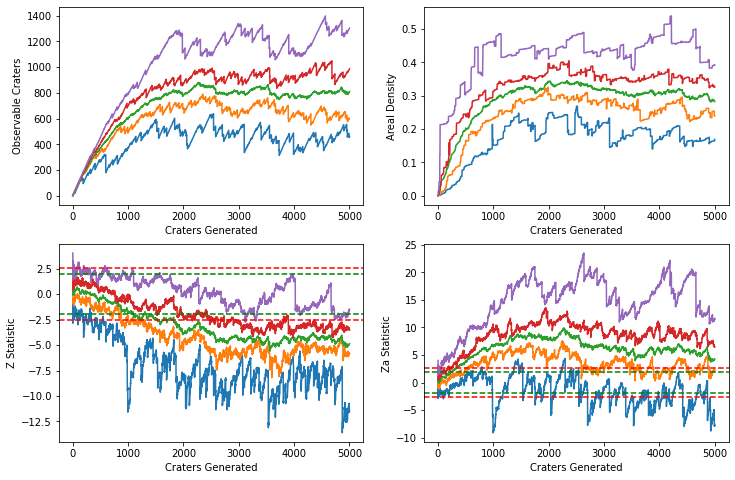

In [6]:
plot_statistics(python_stats)

In [ ]:
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in range(1, 55)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_added_in_observed_area', 'n_craters_in_observed_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

idl_stats = aggregate_simulations(stats, len(sim_stats))
idl_stats.tail()

In [ ]:
plot_statistics(idl_stats)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot crater count
ax = axes[0][0]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.n_craters_in_observed_area_mean, color='b')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.n_craters_in_observed_area_mean, color='r')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Observable Craters')

# Plot crater count
ax = axes[0][1]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.areal_density_mean, color='b')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.areal_density_mean, color='r')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Areal Density')

# Plot Z statistic
ax = axes[1][0]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.z_mean, color='b')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.z_mean, color='r')
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Z Statistic')

# Plot Za statistic
ax = axes[1][1]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.za_mean, color='b')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.za_mean, color='r')
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Za Statistic')

plt.show()

### Comparing Curves

In [ ]:
import scipy.stats

def compare_curves(first: pd.DataFrame,
                   second: pd.DataFrame,
                   columns: List[str]):
    first_diff = first[columns]
    # first_diff = (first_diff - first_diff.shift(1)).dropna()

    second_diff = second[columns]
    # second_diff = (second_diff - second_diff.shift(1)).dropna()
    
    print('Two-sample Anderson-Darling tests:')
    for column in columns:
        result = scipy.stats.anderson_ksamp([first_diff[column], second_diff[column]])
        print(f'{column}: {result.significance_level:0.3f}')
    
    print('\nTwo-sample Kolmogorov-Smirnoff tests:')
    for column in columns:
        result = scipy.stats.kstest(first_diff[column], second_diff[column])
        print(f'{column}: {result.pvalue:0.3f}')

In [ ]:
first_choices = np.random.choice(range(1, 55), 27, replace=False)
second_choices = [x for x in range(1, 55) if x not in first_choices]

In [ ]:
# First compare half the IDL data to the other half as a reference
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in first_choices
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_added_in_observed_area', 'n_craters_in_observed_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

idl_stats1 = aggregate_simulations(stats, len(sim_stats))
idl_stats1.tail()

In [ ]:
# First compare half the IDL data to the other half as a reference
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in second_choices
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_added_in_observed_area', 'n_craters_in_observed_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

idl_stats2 = aggregate_simulations(stats, len(sim_stats))
idl_stats2.tail()

In [ ]:
columns = ['n_craters_in_observed_area_mean', 'areal_density_mean', 'z_mean', 'za_mean']
compare_stats(idl_stats1, idl_stats2, columns)

In [ ]:
compare_stats(python_stats, idl_stats, columns)